In [14]:
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("customer_profiles.csv") 
df.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  object 
 1   age                                14825 non-null  int64  
 2   id                                 14825 non-null  object 
 3   became_member_on (year month day)  14825 non-null  int64  
 4   income                             14825 non-null  float64
 5   ever_married                       14825 non-null  object 
 6   kids                               14825 non-null  int64  
 7   home_state                         14825 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 926.7+ KB


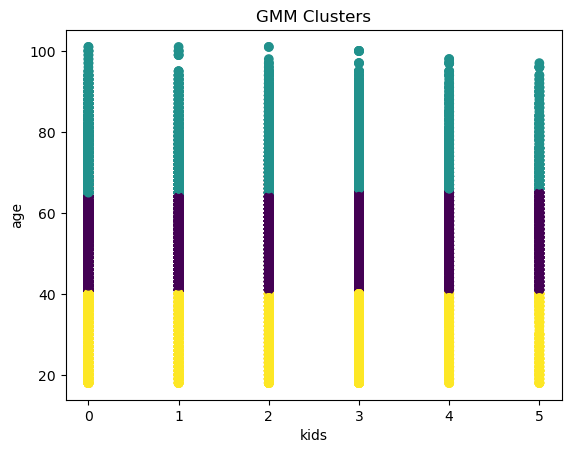

In [17]:
# Assuming 'feature1' and 'feature2' are the relevant numerical columns for the GMM
features = df[['age', 'kids']]

# Specify the number of components (clusters)
n_components = 3  # You can choose the appropriate number based on your analysis

# Create and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(features)

cluster_assignments = gmm.predict(features)
df['cluster'] = cluster_assignments

# Scatter plot of the clusters
plt.scatter(df['kids'], df['age'], c=df['cluster'], cmap='viridis')
plt.title('GMM Clusters')
plt.xlabel("kids")
plt.ylabel('age')
plt.show()